In [1]:
#Suppress error messages about CPU
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Settings for better notebook visualization
%matplotlib inline
plt.style.use('seaborn-whitegrid')

# Pandas display options
pd.set_option('display.max_columns', 10)
pd.set_option('display.precision', 2)

# Directories:
data_dir = './data/'    # Location of files
fig_path = './figures_FC_abundance/' # To save output figures


## Import data

In [2]:
# Import data relevant for correlating gene expression with differential abundance

# Names of files:
files_dict = {'abundance_FC':'23-01-15_abundance_fc_hua_states_v3p2.csv',
'prolif_score':'23-01-16_prolif_score24.csv',
'inst_prolif_score':'instantaneous_prolif24h.csv'
             }

# Mapping between old and new state names:
uses_new = ['inst_prolif_score']
oldnew_names_file = 'state_names_old_new.xlsx'
oldnew_df = pd.read_excel(f'{data_dir}{oldnew_names_file}')
mapping_series = oldnew_df.set_index('Old names')['New Names']

response_df = pd.DataFrame()

for column_name, file_path in files_dict.items():
    # Read the CSV file, skip the header, and use the first column as the index
    df = pd.read_csv(data_dir+file_path, header=None, skiprows=1, index_col=0, usecols=[0, 1])
    
    # Rename the second column to match the dictionary key
    df.columns = [column_name]
    
    # Check if using old state names, and if so update to new names
    if column_name not in uses_new:
        df.index = df.index.map(mapping_series)
    
    # Join with the combined dataframe; this also aligns the data by the index
    if response_df.empty:
        response_df = df
    else:
        response_df = response_df.join(df, how='outer')

# Rename axis:
response_df = response_df.rename_axis('Cell states')


# Convert proliferation and fc to log2 scale:
response_df['abundance_log2FC'] = np.log2(response_df['abundance_FC'])
response_df['log2(prolif_score)'] = np.log2(response_df['prolif_score'])
response_df['log2(inst_prolif)'] = np.log2(response_df['inst_prolif_score'])
response_df = response_df.drop('abundance_FC', axis=1)
response_df = response_df.drop('prolif_score', axis=1)
response_df = response_df.drop('inst_prolif_score', axis=1)
        
# Show the combined dataframe
response_df

,abundance_log2FC,log2(prolif_score),log2(inst_prolif)
Cell states,,,
Cardiac muscle 1,1.54,2.86,-0.08
Cardiac muscle 2,1.62,2.17,-0.77
Differentiating neurons,-1.50,5.50,2.38
Endodermal lining,0.23,0.70,0.24
Endothelial,0.71,5.13,0.96
Epidermal other,0.52,2.58,0.69
Erythroid,-1.02,6.24,2.05
Fast muscle,0.59,1.94,0.33
Floorplate,1.09,1.55,2.34


In [3]:
# Import gene expression data @ 24hpf:
all_gene_file = 'cp10k_per_state_24h.csv'
#all_gene_file_18hpf = 'cp10k_per_state_18h.csv'

df_all_genes = pd.read_csv(data_dir+all_gene_file, header=0, index_col=0)
#df_all_genes_18hpf = pd.read_csv(all_gene_file_18hpf, header=0, index_col=0)

# Look at the centroid gene expression file:
df_all_genes


,LOC100000009,LOC100000024,LOC100000058,LOC100000086,LOC100000094,...,zyg11,zymnd12,zyx,zzef1,zzz3
Cardiac muscle 1,4.44e-02,0.00e+00,0.00e+00,0.00e+00,2.80e-02,...,0.05,0.00e+00,2.66,0.11,0.35
Cardiac muscle 2,0.00e+00,0.00e+00,0.00e+00,0.00e+00,6.58e-02,...,0.00,0.00e+00,5.09,0.27,0.31
Differentiating neurons,4.31e-02,0.00e+00,6.63e-03,1.93e-03,2.04e-02,...,0.20,3.27e-03,0.18,0.13,0.45
Endodermal lining,3.36e-02,0.00e+00,0.00e+00,0.00e+00,1.87e-02,...,0.08,4.02e-03,0.56,0.19,0.41
Endothelial,3.20e-02,0.00e+00,2.43e-03,0.00e+00,1.51e-02,...,0.13,7.90e-03,1.28,0.23,0.38
Epidermal other,3.25e-02,8.23e-04,5.58e-03,1.73e-03,1.34e-02,...,0.17,1.27e-03,2.95,0.26,0.25
Erythroid,9.62e-03,2.61e-04,1.80e-03,1.09e-03,3.09e-03,...,0.14,2.02e-03,0.08,0.08,0.17
Fast muscle,1.96e-02,0.00e+00,0.00e+00,0.00e+00,1.14e-02,...,0.03,1.20e-02,0.08,0.10,0.05
Floorplate,5.14e-02,0.00e+00,0.00e+00,0.00e+00,0.00e+00,...,0.19,0.00e+00,0.69,0.10,0.21
Forebrain,5.72e-02,2.95e-03,7.01e-03,0.00e+00,1.72e-02,...,0.08,0.00e+00,0.45,0.12,0.46


## Define subroutines for correlation analysis and plotting:

In [4]:
# Define a function for calculating correlations, and generating a randomized reference
def calculate_correlations(y, df_X, num_rand=10):
    # Calculates correlations and returns randomized correlations as well
    # Inputs:
    # y: a single dataframe column with m rows
    # X: a dataframe with same m indices as y, and n columns
    #
    # Outputs:
    # C: 1xn array correlation of y with each of the n column of X
    # R: a dictionary with num_rand elements, with keys 0,...,num_rand-1. 
    #    Values are arrays of size C generated after independent random permuations of y
    
    C = df_X.corrwith(y)
    
    R = {}
    for i in range(num_rand):
        y_rnd = np.random.permutation(y)
        # Convert the randomized numpy array back to a pandas Series
        y_rnd = pd.Series(y_rnd, index=y.index)  # It's important to retain the original index

        # Now calculate the correlation with the randomized y
        R[i] = df_X.corrwith(y_rnd, method='pearson')
        print(f'Completed calculating randomized correlations, iteration {i+1}.')

    return C, R


In [5]:
def plot_corrHist(C, R, label,binsize=0.02, fig_label=None):
    
    plt.figure(figsize=(4, 4))
    
    plt.hist(C,bins=np.arange(-1,1,binsize),label='Observed',alpha=0.8)
    plt.xlabel(f'Pearson correlation with {label}', fontsize=13)
    plt.ylabel('Number genes',fontsize=13)

    n_rnd = len(R)
    
    bin_edges = np.arange(-1,1,binsize)
    h_rnd = np.zeros(len(bin_edges)-1)
    for i,C_rnd in enumerate(R.values()):
        w, b = np.histogram(C_rnd,bins=bin_edges)
        h_rnd = h_rnd + w
    h_rnd = h_rnd / n_rnd
    print(np.max(h_rnd))

    bin_ctrs = bin_edges[0:-1]+binsize/2
    
    plt.plot(bin_ctrs,h_rnd,'k-',label=f'Randomized (x{n_rnd})')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=10, loc='upper left', bbox_to_anchor=(1,1))
    
    if fig_label == None:
        fig_name = fig_path+'fig_corr_hist_'+label
    else:
        fig_name = fig_path+'fig_corr_hist_'+fig_label
        
        
    plt.tight_layout()
    plt.savefig(fig_name+'.pdf')
    plt.show()

In [6]:
def plot_top_corr_genes(C, label, num_genes=None, threshold=0.55,  invert_axis = False, fig_label=None, gene_list=None):

    # If num_genes == None, then keep genes above threshold correlation
    # Otherwise, find the threshold:
    if num_genes != None: 
        # Remove nan values:
        z = C[~np.isnan(C)].values
        # Calculate quantile:
        q = (1-num_genes/len(z))*0.999999999
        threshold = np.quantile(np.abs(z),q)
        
    elif gene_list != None: # If a list of genes is provided, then plot all this list
        C = C[gene_list]
        threshold=0
        
        
    if invert_axis:
        top_ranked_corr = C[np.abs(C)>threshold].sort_values(ascending=True)
    else:
        top_ranked_corr = C[np.abs(C)>threshold].sort_values(ascending=False)
    
    # Plot
    plt.figure(figsize=(5, 3))
    plt.plot(top_ranked_corr.index, top_ranked_corr.values,'o--k')
    plt.ylabel('Pearson R')
    plt.title(f'Correlation of expression with {label}')
    plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
    if invert_axis:
        plt.gca().invert_yaxis()
        
        
    if fig_label == None:
        fig_name = fig_path+'fig_top_corr_'+label
    else:
        fig_name = fig_path+'fig_'+fig_label
    
    plt.tight_layout()
    plt.savefig(fig_name+'.pdf')
    plt.show()

    print('Genes in plot:')
    [print(g) for g in top_ranked_corr.index]
    print('')


In [32]:
from adjustText import adjust_text

def plot_gene_vs_y_scatter(gene_name, y, ylabel, use_ranked=False, show_state_labels = True, corrlabel_xy=(0.05, 0.95)):

    # Get the gene expression values:
    x = df_all_genes[gene_name] 

    # Test if using ranked values of y, or raw values:
    if use_ranked:
        y_ranked = y.rank().values
        y = y_ranked
    else:
        y = y.values

    # Generate plot with regression curve:
    plt.figure(figsize=(4.5, 4))
    sns.regplot(x=x, y=y, color='black', marker='o')

    # Calculate the correlation coefficient
    corr_coef = np.corrcoef(x, y)[0, 1]

    # Annotate the plot with the correlation coefficient
    plt.annotate(f'Correlation: {corr_coef:.2f}', xy=corrlabel_xy, xycoords='axes fraction', ha='left', va='top')

    # Annotating each point with its index value
    if show_state_labels:
        for i, txt in enumerate(response_df.index):
            plt.annotate(txt, (x[i], y[i]),fontsize=8)

    plt.xlabel(f'{gene_name} expression, CP10K',fontsize=13)
    if use_ranked:
        plt.ylabel(f'Rank-order of {ylabel}',fontsize=13)
        fig_name = fig_path+'fig_corr_ranked_'+ylabel+f'_{gene_name}'
    else:
        plt.ylabel(ylabel,fontsize=13)
        fig_name = fig_path+'fig_corr_ranked_'+ylabel+f'_{gene_name}'
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(False)
    #adjust_text()
    plt.tight_layout()
    plt.savefig(fig_name+'_prettier.pdf')
    plt.show()
    print(f'Correlation: {corr_coef:.2f}')

## Calculate and plot gene expression correlations with fold-change in abundance

In [25]:
# Calculate correlations for fold-change after HUA:
all_corr, rnd_corr = calculate_correlations(response_df['abundance_log2FC'], df_all_genes)

Completed calculating randomized correlations, iteration 1.
Completed calculating randomized correlations, iteration 2.
Completed calculating randomized correlations, iteration 3.
Completed calculating randomized correlations, iteration 4.
Completed calculating randomized correlations, iteration 5.
Completed calculating randomized correlations, iteration 6.
Completed calculating randomized correlations, iteration 7.
Completed calculating randomized correlations, iteration 8.
Completed calculating randomized correlations, iteration 9.
Completed calculating randomized correlations, iteration 10.


1557.4


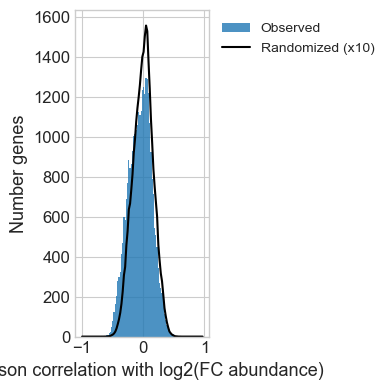

In [26]:
# Plot and save histograms:
plot_corrHist(all_corr, rnd_corr, label='log2(FC abundance)', fig_label=None)

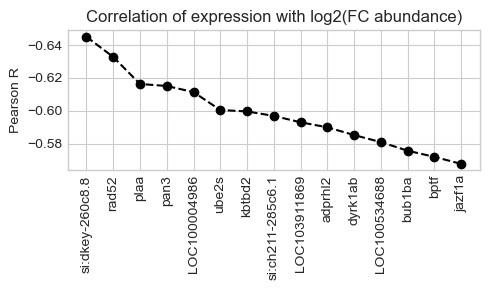

Genes in plot:
si:dkey-260c8.8
rad52
plaa
pan3
LOC100004986
ube2s
kbtbd2
si:ch211-285c6.1
LOC103911869
adprhl2
dyrk1ab
LOC100534688
bub1ba
bptf
jazf1a



In [27]:
# Plot the top correlated genes:
plot_top_corr_genes(all_corr, label='log2(FC abundance)', num_genes=15,  invert_axis = True)

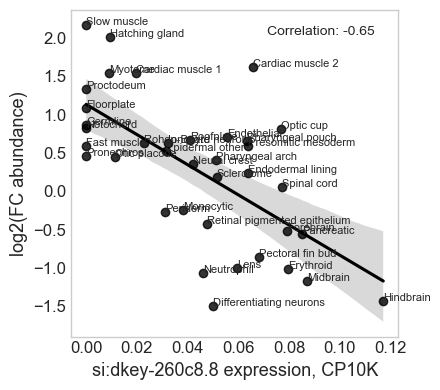

Correlation: -0.65


In [33]:
plot_gene_vs_y_scatter('si:dkey-260c8.8', response_df['abundance_log2FC'] , 'log2(FC abundance)', use_ranked=False, 
                       show_state_labels = True, corrlabel_xy=(0.6, 0.95))

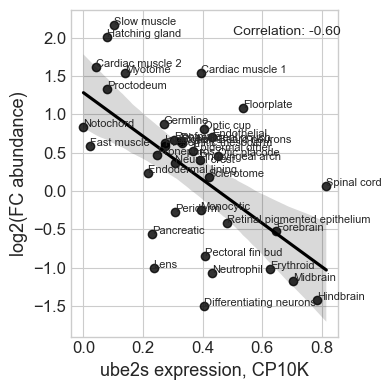

Correlation: -0.60


In [12]:
plot_gene_vs_y_scatter('ube2s', response_df['abundance_log2FC'] , 'log2(FC abundance)', use_ranked=False, 
                       show_state_labels = True, corrlabel_xy=(0.605, 0.95))

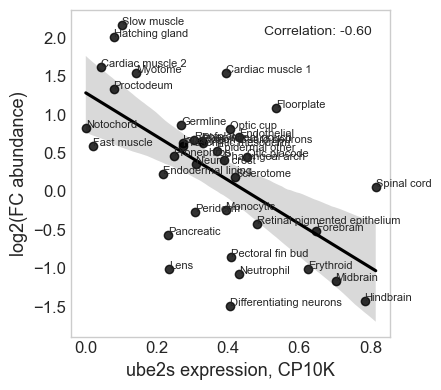

Correlation: -0.60


In [34]:
plot_gene_vs_y_scatter('ube2s', response_df['abundance_log2FC'] , 'log2(FC abundance)', use_ranked=False, 
                       show_state_labels = True, corrlabel_xy=(0.605, 0.95))

In [49]:
def plot_gene_vs_y_scatter2(gene_name, y, ylabel, use_ranked=False, show_state_labels = True, corrlabel_xy=(0.05, 0.95)):

    # Get the gene expression values:
    x = df_all_genes[gene_name] 

    # Test if using ranked values of y, or raw values:
    if use_ranked:
        y_ranked = y.rank().values
        y = y_ranked
    else:
        y = y.values

    # Generate plot with regression curve:
    plt.figure(figsize=(4, 4))
    sns.regplot(x=x, y=y, color='black')

    # Calculate the correlation coefficient
    corr_coef = np.corrcoef(x, y)[0, 1]

    # Annotate the plot with the correlation coefficient
    #plt.annotate(f'Correlation: {corr_coef:.2f}', xy=corrlabel_xy, xycoords='axes fraction', ha='left', va='top', fontsize = 15)

    # Annotating each point with its index value
    if show_state_labels:
        for i, txt in enumerate(response_df.index):
            plt.annotate(txt, (x[i], y[i]),fontsize=8)

    plt.xlabel(f'{gene_name} expression, CP10K',fontsize=13)
    if use_ranked:
        plt.ylabel(f'Rank-order of {ylabel}',fontsize=13)
        fig_name = fig_path+'fig_corr_ranked_'+ylabel+f'_{gene_name}'
    else:
        plt.ylabel(ylabel,fontsize=13)
        fig_name = fig_path+'fig_corr_ranked_'+ylabel+f'_{gene_name}'
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(False)

    plt.tight_layout()
    plt.savefig(fig_name+'_kk.pdf', dpi=300)
    plt.show()
    print(f'Correlation: {corr_coef:.2f}')

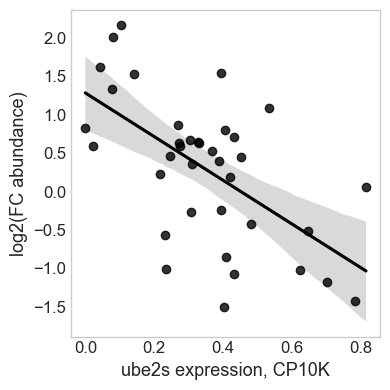

Correlation: -0.60


In [50]:
plot_gene_vs_y_scatter2('ube2s', response_df['abundance_log2FC'] , 'log2(FC abundance)', use_ranked=False, 
                       show_state_labels = False, corrlabel_xy=(0.605, 0.95))

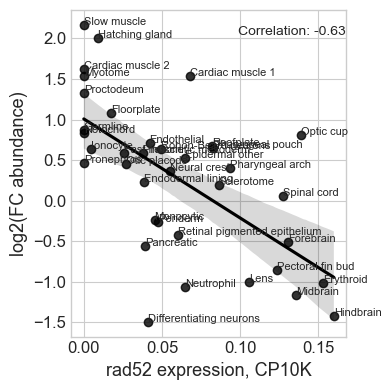

Correlation: -0.63


In [45]:
plot_gene_vs_y_scatter('rad52', response_df['abundance_log2FC'] , 'log2(FC abundance)', use_ranked=False, 
                       show_state_labels = True, corrlabel_xy=(0.605, 0.95))

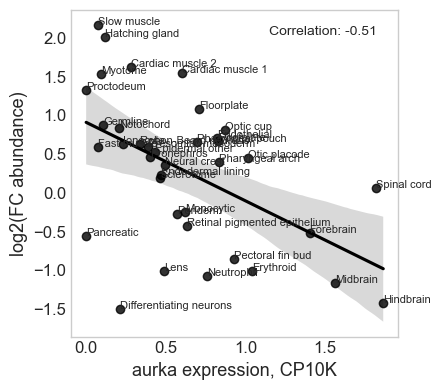

Correlation: -0.51


In [37]:
plot_gene_vs_y_scatter('aurka', response_df['abundance_log2FC'] , 'log2(FC abundance)', use_ranked=False, 
                       show_state_labels = True, corrlabel_xy=(0.605, 0.95))

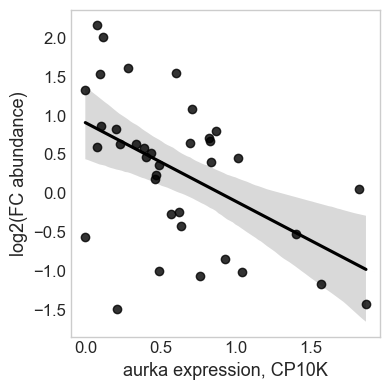

Correlation: -0.51


In [51]:
plot_gene_vs_y_scatter2('aurka', response_df['abundance_log2FC'] , 'log2(FC abundance)', use_ranked=False, 
                       show_state_labels = False, corrlabel_xy=(0.605, 0.95))

## Manually examine correlation to selected cell cycle genes:

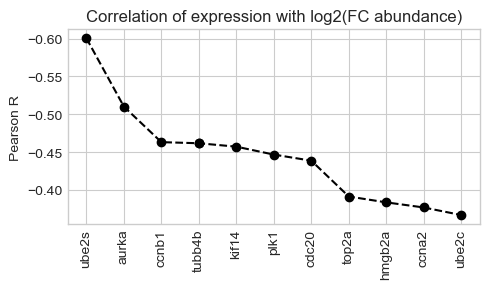

Genes in plot:
ube2s
aurka
ccnb1
tubb4b
tubb4b
kif14
plk1
cdc20
top2a
hmgb2a
ccna2
ube2c



In [30]:
gene_list = ['aurka','plk1','ccnb1','kif14','ube2c','tubb4b','cdc20','ube2s','top2a','tubb4b','hmgb2a','ccna2']
use_label = 'log2(FC abundance)'
plot_top_corr_genes(all_corr, label=use_label, 
                    gene_list=gene_list,  invert_axis = True, fig_label='cc_genes_log2(expansion 18-24hpf)')

In [47]:
def plot_top_corr_genes2(C, label, num_genes=None, threshold=0.55,  invert_axis = False, fig_label=None, gene_list=None):

    # If num_genes == None, then keep genes above threshold correlation
    # Otherwise, find the threshold:
    if num_genes != None: 
        # Remove nan values:
        z = C[~np.isnan(C)].values
        # Calculate quantile:
        q = (1-num_genes/len(z))*0.999999999
        threshold = np.quantile(np.abs(z),q)
        
    elif gene_list != None: # If a list of genes is provided, then plot all this list
        C = C[gene_list]
        threshold=0
        
        
    if invert_axis:
        top_ranked_corr = C[np.abs(C)>threshold].sort_values(ascending=True)
    else:
        top_ranked_corr = C[np.abs(C)>threshold].sort_values(ascending=False)
    
    # Plot
    plt.figure(figsize=(5, 3))
    plt.plot(top_ranked_corr.index, top_ranked_corr.values,'o--k')
    plt.ylabel('Pearson R')
    plt.title(f'Correlation of expression with {label}')
    plt.xticks(rotation=90, fontstyle = 'italic')  # Rotate the x-axis labels for better readability
    if invert_axis:
        plt.gca().invert_yaxis()
        
        
    if fig_label == None:
        fig_name = fig_path+'fig_top_corr_'+label
    else:
        fig_name = fig_path+'fig_'+fig_label
    
    plt.tight_layout()
    plt.grid(False)
    plt.savefig(fig_name+'.pdf', dpi=300)
    plt.show()

    print('Genes in plot:')
    [print(g) for g in top_ranked_corr.index]
    print('')


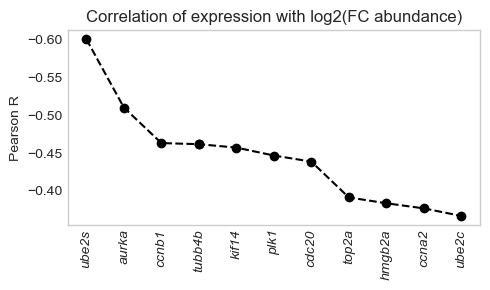

Genes in plot:
ube2s
aurka
ccnb1
tubb4b
tubb4b
kif14
plk1
cdc20
top2a
hmgb2a
ccna2
ube2c



In [48]:
gene_list = ['aurka','plk1','ccnb1','kif14','ube2c','tubb4b','cdc20','ube2s','top2a','tubb4b','hmgb2a','ccna2']
use_label = 'log2(FC abundance)'
plot_top_corr_genes2(all_corr, label=use_label, 
                    gene_list=gene_list,  invert_axis = True, fig_label='cc_genes_log2(expansion 18-24hpf)_kk')